<a href="https://colab.research.google.com/github/Laura-Burgmane/Python/blob/main/P%2310_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon_df = pd.read_csv('/content/Pokemon.csv')#read a comma separated data (csv)file into a Dataframe
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


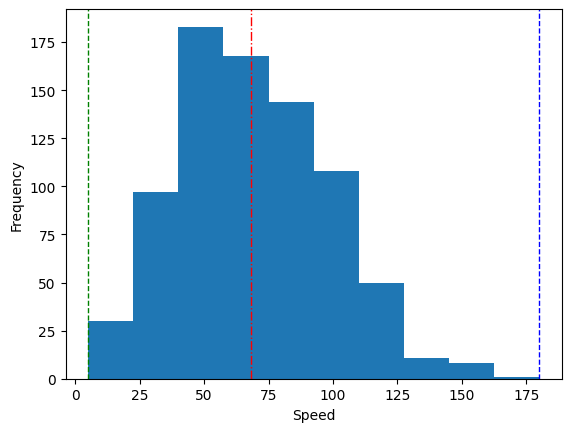

In [26]:
plt.hist(pokemon_df["Speed"])
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.axvline(pokemon_df["Speed"].mean(), color='red', linestyle='dashdot', linewidth=1)
plt.axvline(pokemon_df["Speed"].max(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(pokemon_df["Speed"].min(), color='green', linestyle='dashed', linewidth=1)

Text(0, 0.5, 'Defense')

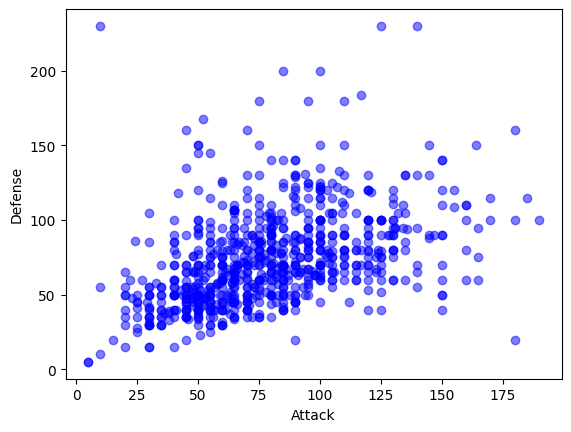

In [14]:
#CORRELATION
#scatter plot comparing variables attack and defence
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color = 'blue', alpha = 0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'DEFENSE')

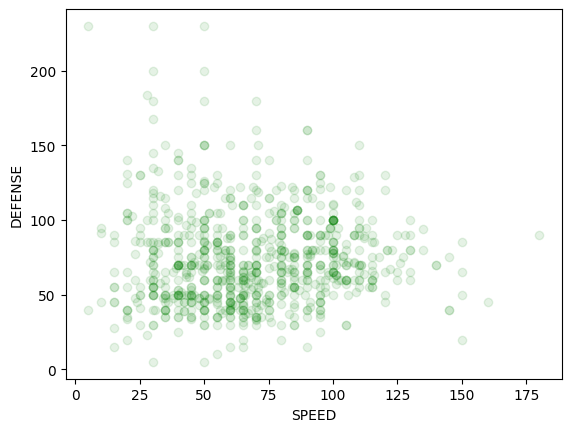

In [19]:
plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color = 'green', alpha = 0.1)
plt.xlabel('SPEED')
plt.ylabel('DEFENSE')

Text(0, 0.5, 'DEFENSE')

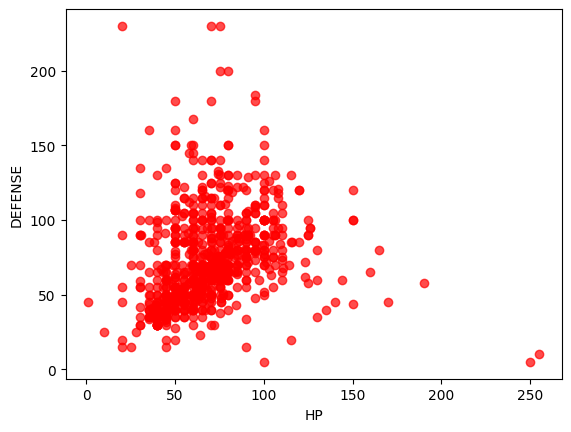

In [22]:
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color = 'red', alpha = 0.7)
plt.xlabel('HP')
plt.ylabel('DEFENSE')

In [ ]:
### PEARSON CORRELATION - calculates relation between 2 variables
#result will be between -1 and 1
# -1 is perfect negative relationship
# 1 is perfest positive relationship


The correlation coefficient indicates the strength and direction of the statistical relationship between two variables. The coefficient ranges from -1 to 1, with a value of 0.43 signifying a positive but moderately strong relationship between the two variables.

A positive correlation coefficient means that the variables increase together. Therefore, as one variable increases, the other also tends to increase, and vice versa.
The closer the correlation coefficient is to 1, the stronger the positive relationship.
A correlation coefficient of 0.43 is not very high, but it indicates a moderately positive relationship.
If the correlation coefficient were negative, it would suggest that as one variable increases, the other variable decreases.
A correlation coefficient of -1 indicates a perfect negative relationship.
Thus, a correlation coefficient of 0.43 might suggest that, for example, as Pokémon's Attack values increase, their Defense values tend to increase as well, but the relationship is not very strong.

In [27]:
#pearson corr btw Attack/Defense
correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [28]:
correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation2

0.015226598088597448

In [29]:
correlation3 = pokemon_df['HP'].corr(pokemon_df['Defense'])
correlation3

0.2396223188467258

In [38]:
#select only numeric columns:
numeric_columns = pokemon_df.select_dtypes(include = ['number'])
numeric_columns = numeric_columns.drop('#', axis = 1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
#using for loop compare the target col Attack to other numeric cols
#save the date in a dictionary
#use pearson correlation


In [42]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns
target_column = 'Attack'
correlation_results = {} #key = column, val=pearson_correlation

# for loop comparing target column and all other columns in the DataFrame

for col in numeric_columns.columns:
  if col =='Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

In [46]:
### CORRELATION MATRIX
correlation_matrix = numeric_columns.corr() #all cols are numeric here
correlation_matrix


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


In [48]:
# VISUALISING WITH SEABORN
import seaborn as sns


Text(0.5, 1.0, 'CORRELATION MATRIX')

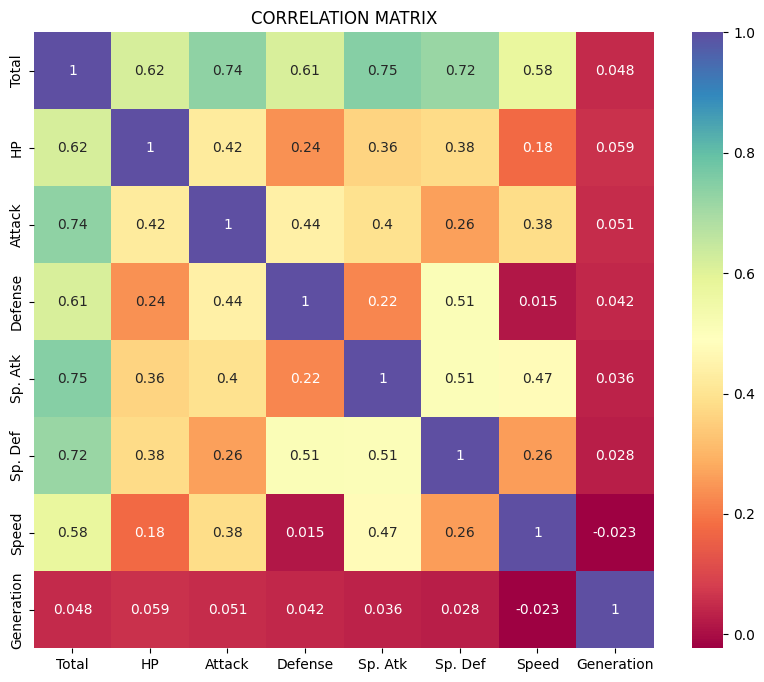

In [54]:
plt.figure(figsize = (10, 8)) #increasing the size by tuple
sns.heatmap(correlation_matrix, cmap = 'Spectral', annot = True) #argument annotation means adding values
plt.title('CORRELATION MATRIX')#adding title by matplotlib (plt)
#

In [ ]:
#SPURIOUS CORRELATIONS
#weird website, correlation btw hot weather - icecream sales - sunburn (see pinned messages)

<Axes: xlabel='Attack', ylabel='Defense'>

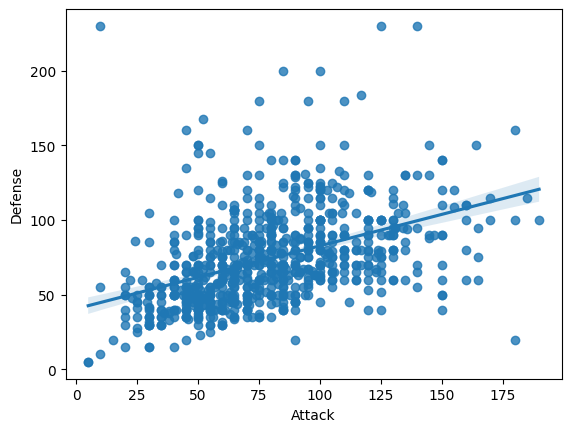

In [56]:
#LINEAR REGRESSION
#predicts one value based on other, regression line (can be linear or non-linear)
sns.regplot(x = 'Attack', y = 'Defense', data = pokemon_df)

Text(0.5, 1.0, 'Speed vs Defense')

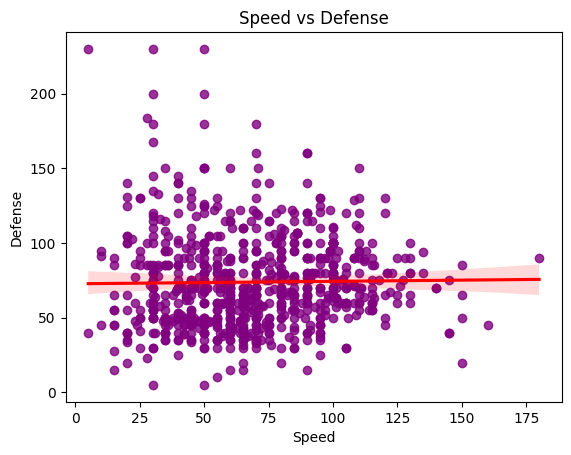

In [58]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='o', line_kws={'color':'red'})
plt.title('Speed vs Defense')

Pearson correlation coefficient: 0.015226598088597448


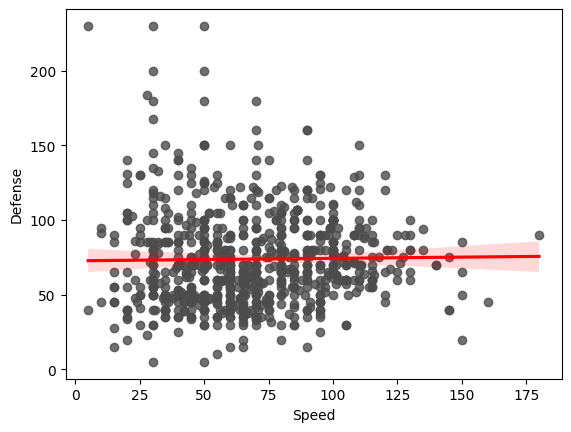

In [64]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=99, marker="o", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)